In [23]:
from m10ae_utils import *
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from collections import defaultdict

In [37]:
NSAMPLES = 300000
# NSAMPLES = 150000
prob_h = (1/np.array(range(2, MAX_DEPTH+1)) )**(1.5)
prob_h = prob_h / prob_h.sum()
nsamples_bound = {h:int(prob_h[h-2]*NSAMPLES) for h in range(2, MAX_DEPTH+1)}
nsamples = defaultdict(int)

In [38]:
t = gen_tree()
print(t)

[[[[[[[[1, '*'], [['(', [[4, '*'], 6]], ')']], '/'], [['(', [[[[[[[[[[[[6, '/'], 7], '*'], 6], '/'], 1], '/'], 9], '-'], 3], '-'], [[7, '/'], 3]]], ')']], '+'], [[[[[[[['(', [[[[[[7, '*'], 2], '*'], 2], '*'], 6]], ')'], '/'], [['(', [[[[8, '+'], [[[[1, '*'], 9], '/'], 8]], '+'], 6]], ')']], '*'], 3], '/'], [['(', 8], ')']]], '+'], 7]


In [39]:
nlst = to_nlst(t)
print(nlst)
print(MSU(nlst))

['1', '*', '(', '4', '*', '6', ')', '/', '(', '6', '/', '7', '*', '6', '/', '1', '/', '9', '-', '3', '-', '7', '/', '3', ')', '+', '(', '7', '*', '2', '*', '2', '*', '6', ')', '/', '(', '8', '+', '1', '*', '9', '/', '8', '+', '6', ')', '*', '3', '/', '(', '8', ')', '+', '7']
(6, '2')


In [40]:
examples = []
printed = {h:False for h in range(2, MAX_DEPTH+1)}
i = 0
while True:
    finished = True
    for h in range(2, MAX_DEPTH+1):
        if nsamples[h] < nsamples_bound[h]:
            finished = False
    if finished:
        break
    
    t = gen_tree()
    if t in VALUES:
        continue
    nodes = to_nlst(t)
    nodes = ' '.join(nodes)
    sd_lst, h = to_sd(t)
    if h > MAX_DEPTH:
        continue
    if nsamples[h] >= nsamples_bound[h]:
        if not printed[h]:
            print('finished:', h)
            printed[h] = True
        continue
    else:
        nsamples[h] += 1
    
    sd_lst = ' '.join([str(sd) for sd in sd_lst])
    examples.append((nodes, sd_lst, str(h)))
    i += 1

    if i >= NSAMPLES:
        break
print('Done')

finished: 10
finished: 12
finished: 8
finished: 11
finished: 14
finished: 13
finished: 9
finished: 6
finished: 15
finished: 16
finished: 7
finished: 17
finished: 4
finished: 18
finished: 19
finished: 20
finished: 5
finished: 21
finished: 2
finished: 22
finished: 23
finished: 24
finished: 25
finished: 3
finished: 26
finished: 27
finished: 29
finished: 28
Done


In [41]:
examples[0]

('3 - 9 * ( 5 )', '1 4 1 3 1 2', '4')

In [42]:
es = []
es_eval = []
hs = []
msu_lst = []
for e in examples:
    expr, ds, h = e
    expr = expr.split()
    ds = list(map(int, ds.split()))
    try:
        msu, val = MSU(expr)
#         val, mmc = shift_reduce(expr, ds)
        if msu > 3:
            hs.append(int(h))
            es.append(e)
            es_eval.append((e[0], e[1], e[2], str(val)))
            msu_lst.append(msu)
    except:
        pass

(array([  940., 13118.,  3771., 10695.,  4992.,  7956.,  4858.,  6069.,
         4188.,  4733.,  3591.,  3789.,  3107.,  3111.,  2637.,  2597.,
         2256.,  2250.,  1996.,  1924.,  1743.,  1681.,  1561.,  1486.,
         1339.,  2547.]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 26 Patch objects>)

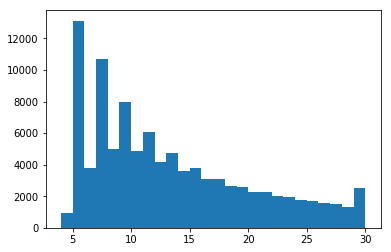

In [43]:
plt.hist(hs, bins=np.arange(min(hs), max(hs)+1))

In [44]:
len(es)

98935

In [46]:
set(msu_lst)

{4, 5, 6}

In [45]:
es[:100]

[('3 - 9 * ( 5 )', '1 4 1 3 1 2', '4'),
 ('7 + ( 1 + 9 * 8 + 6 ) / ( 1 + 5 + 4 - 7 ) * 1',
  '1 12 6 1 3 1 2 4 5 7 8 9 7 1 2 3 4 5 6 8 10 11',
  '12'),
 ('9 * ( 4 * 3 ) * ( 3 ) + 7 + 3 - 3 / 2',
  '1 5 3 1 2 4 6 7 1 2 8 9 10 11 12 13 1 2',
  '13'),
 ('( 6 / 6 / 6 / 7 ) * 6 / ( 3 * 7 - 3 ) + ( 3 - 7 )',
  '7 1 2 3 4 5 6 8 9 10 11 12 5 1 2 3 4 6 13 14 3 1 2 4',
  '14'),
 ('( 5 - 1 - 1 + 3 - 2 * 7 - 6 - 2 ) * 4 / 8',
  '13 1 2 3 4 5 6 7 8 1 2 9 10 11 12 14 15 16 17 18',
  '18'),
 ('( 2 + 6 * 9 / 6 + 1 - 5 * 9 - 5 * 4 * 9 ) / 1 + 2',
  '12 1 5 1 2 3 4 6 7 8 9 1 2 10 11 1 2 3 4 13 14 15 16 17',
  '17'),
 ('( 8 * 8 + 6 + 7 - 8 / 7 * 1 )', '9 1 2 3 4 5 6 7 8 1 2 3 4 10', '10'),
 ('( 4 / 8 + 8 - 7 * 5 - 5 / 7 ) - ( 9 ) / ( 1 ) * 5 - 6',
  '9 1 2 3 4 5 6 1 2 7 8 1 2 10 11 12 1 2 3 4 1 2 5 6 13 14',
  '14'),
 ('( 6 / 8 - 8 * 3 * 4 + 9 - 7 )', '10 1 2 3 5 1 2 3 4 6 7 8 9 11', '11'),
 ('9 - ( 1 * 9 + 4 * 9 ) + ( 2 - 2 )', '1 7 5 1 2 3 4 1 2 6 8 9 3 1 2 4', '9'),
 ('( 5 * 3 / 2 * 1 + 5 + 2 ) + ( 5 

# save

In [47]:
suffix = 'msu456.tsv'

In [48]:
random.shuffle(es_eval)
ntrain = int(0.8 * len(es_eval))
nvalid = int(0.1 * len(es_eval))
ntest = int(0.1 * len(es_eval))
train = es_eval[:ntrain]
valid = es_eval[ntrain: ntrain+nvalid]
test = es_eval[ntrain+nvalid:]

In [50]:
for dataset, dataset_type in zip([train, valid, test], ['train', 'valid', 'test']):
    fname = '%s.%s' % (dataset_type, suffix)
    with open(fname, 'w') as f:
        for line in dataset:
            f.write('\t'.join(line))
            f.write('\n')